In [73]:
from astropy.table import Table
import sys
import analysis_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from lightcurve import Lightcurve
from astropy.io import fits
import plotting
import os

highlight = np.array((66, 135, 245))/255
red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

In [61]:
data = pd.DataFrame()
for file in os.listdir('output/txtoutput'):
    print("reading file: {0}".format(file))
    data = data.append(pd.read_csv('output/txtoutput/'+file, skiprows=1, delimiter='\t'))

reading file: out18.dat
reading file: out3.dat


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


reading file: out2.dat
reading file: out1.dat
reading file: out5.dat
reading file: out4.dat
reading file: out6.dat


/Users/tgordon/research/k2rotv2/utils.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pks = pks[mask]
/Users/tgordon/research/k2rotv2/utils.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prominences = prominences[mask]
/Users/tgordon/research/k2rotv2/utils.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.


/Users/tgordon/research/k2rotv2/utils.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pks = pks[mask]
/Users/tgordon/research/k2rotv2/utils.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prominences = prominences[mask]
/Users/tgordon/research/k2rotv2/utils.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.


/Users/tgordon/research/k2rotv2/utils.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pks = pks[mask]
/Users/tgordon/research/k2rotv2/utils.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prominences = prominences[mask]
/Users/tgordon/research/k2rotv2/utils.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.


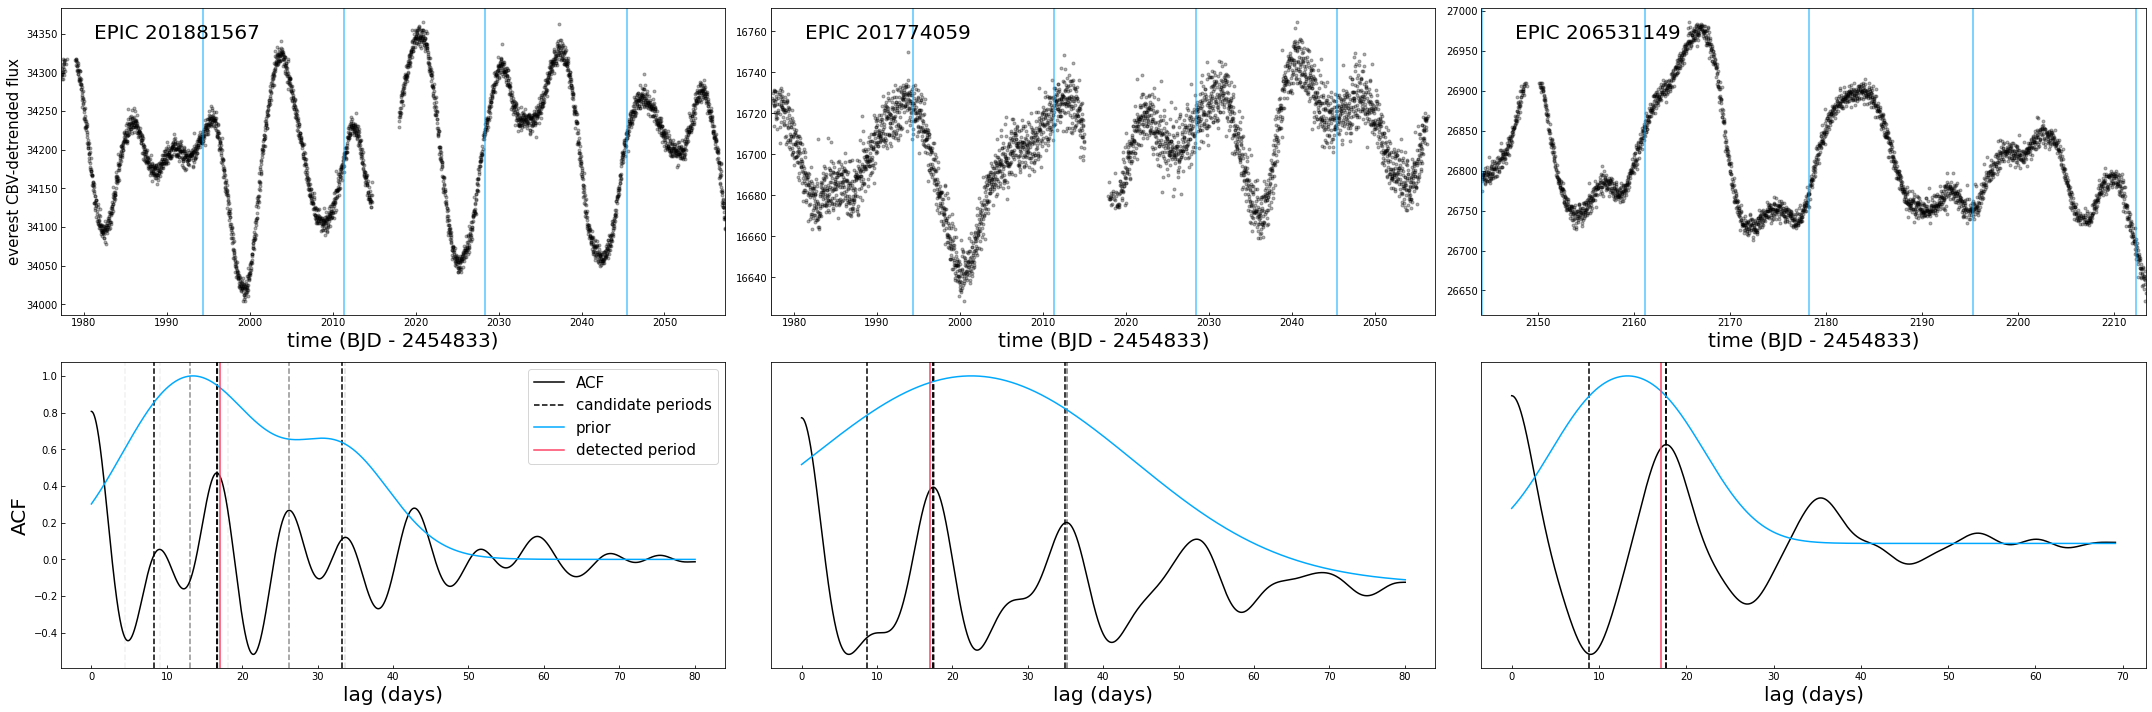

In [112]:
epic_ids = [201881567,
 201774059,
 206531149]

fig, axs = pl.subplots(2, len(epic_ids), figsize=(10*len(epic_ids), 10))
pl.subplots_adjust(wspace=0.1)

for i, eid in enumerate(epic_ids):
    lc = Lightcurve.epic(eid)
    y = lc.flux# - utils.trend(lc.t, lc.flux, 2)
    mask = sigma_clip(y-medfilt(y, kernel_size=301), sigma=3)
    x = lc.t[mask.mask == False]
    y = y[mask.mask == False]
    yerr = np.std(y - medfilt(y, kernel_size=51))
    
    axs[0, i].plot(x, y, 'k.', alpha=0.3)
    plotting.plotacf(axs[1, i], lc, acf_kwargs={'color':'k'}, pk_kwargs={'color':'k', 'linestyle':'--'})
    plotting.plotprior(axs[1, i], lc, normalize=True, color=blue, label='prior')
    period = np.array(data[data['epic'] == epic_id]['P_mean'])

    for j in np.arange(np.int((lc.t[-1]-lc.t[0]) / period)+2):
        axs[0, i].axvline(min(lc.t) + j*period, alpha=0.5, linewidth=2, color=blue)
    axs[0, i].set_xlim(min(lc.t), max(lc.t))

    axs[1, i].axvline(period, color=red, label='detected period')

[ax.set_yticks([]) for ax in axs[1, 1:]]
[ax.set_xlabel('time (BJD - 2454833)', fontsize=20) for ax in axs[0, :]]
[ax.set_xlabel('lag (days)', fontsize=20) for ax in axs[1, :]]
[ax.annotate('EPIC {0}'.format(eid), xy=(0.05, 0.9), xycoords='axes fraction', fontsize=20) for eid, ax in zip(epic_ids, axs[0, :])]
axs[0, 0].set_ylabel('everest CBV-detrended flux', fontsize=15)
axs[1, 0].set_ylabel('ACF', fontsize=20)
axs[1, 0].legend(fontsize=15)
pl.tight_layout()
pl.savefig('/Users/tgordon/Desktop/example_detections.pdf')

/Users/tgordon/research/k2rotv2/utils.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pks = pks[mask]
/Users/tgordon/research/k2rotv2/utils.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prominences = prominences[mask]
/Users/tgordon/research/k2rotv2/utils.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

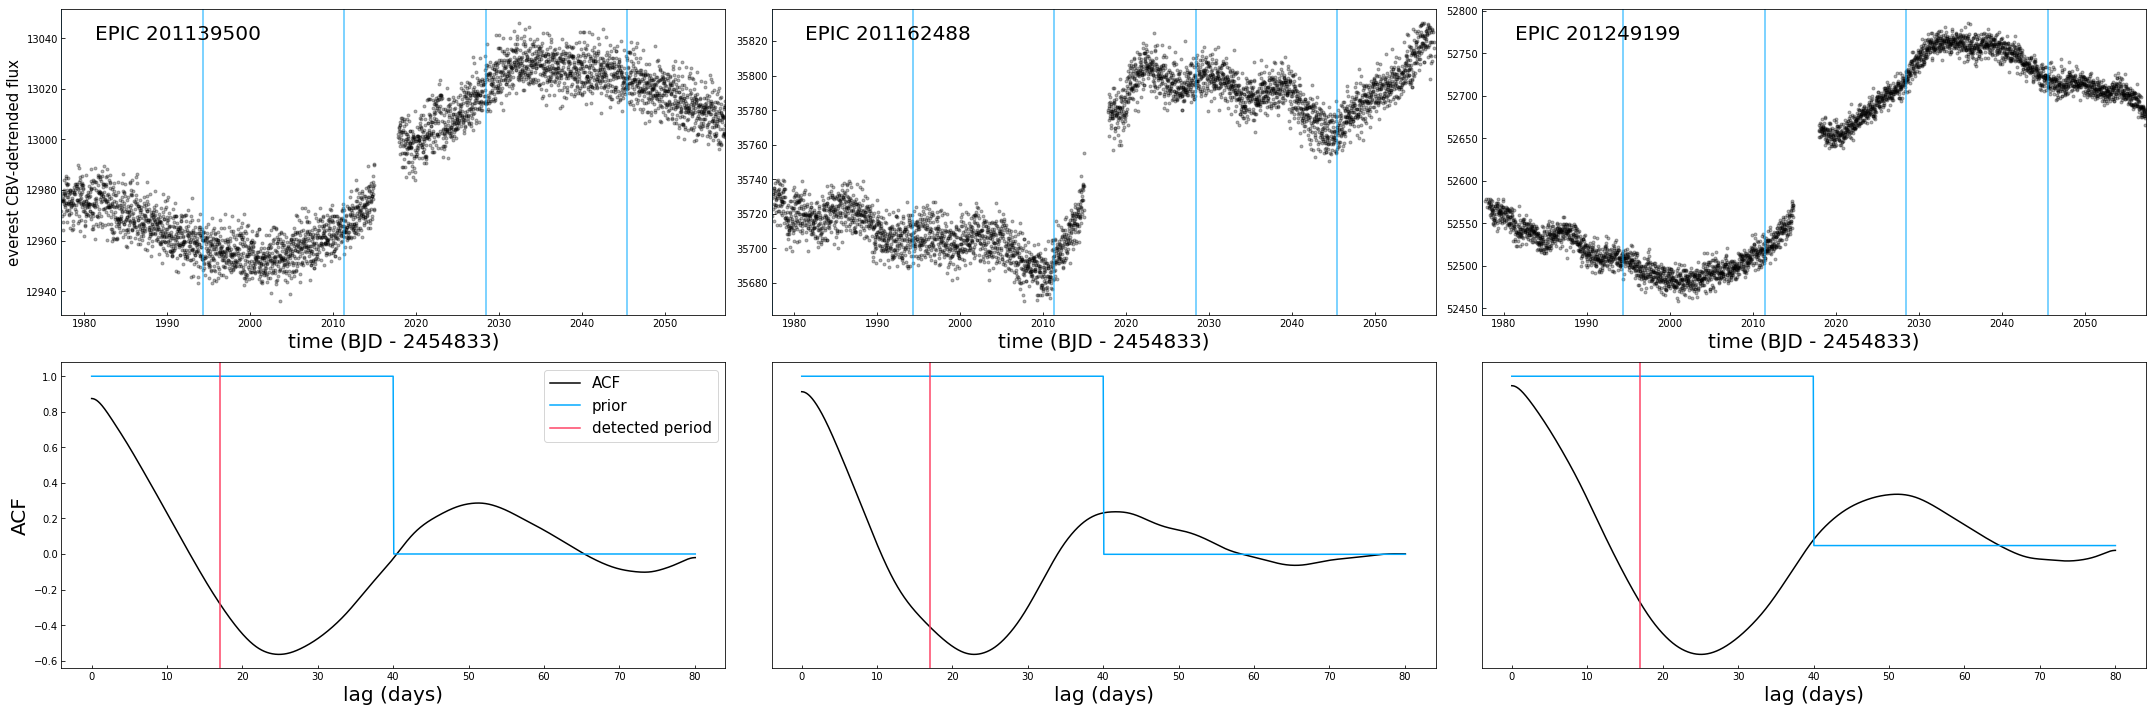

In [113]:
epic_ids = [201139500,
 201162488,
 201249199]

fig, axs = pl.subplots(2, len(epic_ids), figsize=(10*len(epic_ids), 10))
pl.subplots_adjust(wspace=0.1)

for i, eid in enumerate(epic_ids):
    lc = Lightcurve.epic(eid)
    y = lc.flux# - utils.trend(lc.t, lc.flux, 2)
    mask = sigma_clip(y-medfilt(y, kernel_size=301), sigma=3)
    x = lc.t[mask.mask == False]
    y = y[mask.mask == False]
    yerr = np.std(y - medfilt(y, kernel_size=51))
    
    axs[0, i].plot(x, y, 'k.', alpha=0.3)
    plotting.plotacf(axs[1, i], lc, acf_kwargs={'color':'k'}, pk_kwargs={'color':'k', 'linestyle':'--'})
    plotting.plotprior(axs[1, i], lc, normalize=True, color=blue, label='prior')
    period = np.array(data[data['epic'] == epic_id]['P_mean'])

    for j in np.arange(np.int((lc.t[-1]-lc.t[0]) / period)+2):
        axs[0, i].axvline(min(lc.t) + j*period, alpha=0.5, linewidth=2, color=blue)
    axs[0, i].set_xlim(min(lc.t), max(lc.t))

    axs[1, i].axvline(period, color=red, label='detected period')

[ax.set_yticks([]) for ax in axs[1, 1:]]
[ax.set_xlabel('time (BJD - 2454833)', fontsize=20) for ax in axs[0, :]]
[ax.set_xlabel('lag (days)', fontsize=20) for ax in axs[1, :]]
[ax.annotate('EPIC {0}'.format(eid), xy=(0.05, 0.9), xycoords='axes fraction', fontsize=20) for eid, ax in zip(epic_ids, axs[0, :])]
axs[0, 0].set_ylabel('everest CBV-detrended flux', fontsize=15)
axs[1, 0].set_ylabel('ACF', fontsize=20)
axs[1, 0].legend(fontsize=15)
pl.tight_layout()
pl.savefig('/Users/tgordon/Desktop/example_nondetections.pdf')